<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Prepare Data

In [2]:
data=pd.read_csv('googleplaystore.csv')

## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.shape

(10841, 13)

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [8]:
print(data.App.unique())
print('shape:',data.App.unique().shape)

['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
shape: (9660,)


In [9]:
print(data.Category.unique())
print('shape:',data.Category.unique().shape)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
shape: (34,)


In [10]:
data.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [11]:
print(data.Price.unique())

print('shape:',data.Price.unique().shape)

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']
shape: (93,)


In [12]:
print(data['Content Rating'].unique())
print('shape:',data['Content Rating'].unique().shape)

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]
shape: (7,)


In [13]:
print(data['Genres'].unique())
print('shape:',data['Genres'].unique().shape)

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle

In [14]:
print(data['Android Ver'].unique())
print('shape:',data['Android Ver'].unique().shape)

['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']
shape: (34,)


In [15]:
print(data.Installs.unique())
print('shape:',data.Installs.unique().shape)

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']
shape: (22,)


## Data Preprocessing

In [16]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

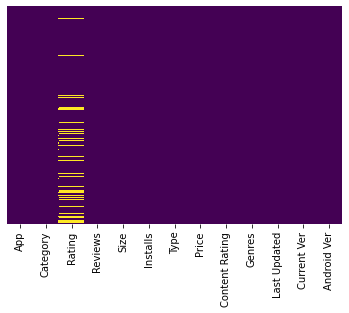

In [17]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



<div class="alert alert-block alert-warning" dir="ltr" style="text-align: center;">
    <strong>
        <span style="font-family: courier new, courier; font-size: 18pt;">جایگذینی مقادیر نا موجود ستون امتیازات با میانگین داده های موجود این ستون</span>
    </strong>
</div>



In [19]:
data['Rating']=data['Rating'].replace(np.NaN,data['Rating'].mean())

In [20]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [21]:
data.dropna(inplace=True)


<div class="alert alert-block alert-warning" dir="ltr" style="text-align: center;">
    <strong>
        <span style="font-family: courier new, courier; font-size: 18pt;">Installs عددی کردن</span>
    </strong>
</div>



In [22]:
install_list=[]
for i in data.Installs:
    #print(i.split('+')[0])
    i=i.split('+')[0].split(',')
    integer='0'
    for j in (i):
        integer += str(j)
        
        
    integer=int(integer)
    install_list.append(integer)
    
    
install_int=pd.Series(install_list)
data['Installs']=install_int
   

In [23]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2633,Patook - make platonic friends,SOCIAL,4.000000,3677,50M,5000000.0,Free,0,Mature 17+,Social,"June 21, 2018",10.6.3,5.0 and up
10206,Lite for Facebook Messenger,COMMUNICATION,4.300000,76498,4.3M,100000.0,Free,0,Teen,Communication,"June 20, 2018",6.3.2,Varies with device
8761,Dr. Cares - Pet Rescue 911 🐶,FAMILY,4.200000,14432,35M,1000000.0,Free,0,Everyone,Casual,"September 21, 2017",1.5,4.0.3 and up
5449,AP ENPS Mobile,PRODUCTIVITY,4.100000,22,545k,10000.0,Free,0,Everyone,Productivity,"March 8, 2016",8.0.0130,4.4 and up
8901,DU Browser—Browse fast & fun,COMMUNICATION,4.300000,1133539,4.7M,1000000.0,Free,0,Everyone,Communication,"April 1, 2016",6.4.0.4,4.0 and up
1198,Easy and quick desserts,FOOD_AND_DRINK,4.600000,1398,10M,10000000.0,Free,0,Everyone 10+,Food & Drink,"June 14, 2018",1.0,4.0.3 and up
2389,Block Buddy,MEDICAL,4.000000,15,5.0M,1000.0,Paid,$14.99,Everyone,Medical,"August 1, 2018",7.6.14,4.0 and up
5122,Tri-Ag (WV) FCU,FINANCE,4.193338,0,2.9M,1.0,Free,0,Everyone,Finance,"July 3, 2018",3.1.10,4.1 and up
9392,Instant Buttons: The Best Soundboard,FAMILY,4.500000,157322,9.2M,10000000.0,Free,0,Teen,Entertainment,"January 5, 2018",1.0.15,4.1 and up
2078,Dr. Panda Town: Vacation,FAMILY,3.800000,10366,78M,10000000.0,Free,0,Everyone,Education;Pretend Play,"July 24, 2018",1.2.1,4.1 and up



<div class="alert alert-block alert-warning" dir="ltr" style="text-align: center;">
    <strong>
        <span style="font-family: courier new, courier; font-size: 18pt;">عددی کردن ستون سایز </span>
    </strong>
</div>



In [24]:
def clean_size(size):
    if size == 'Varies with device':
        size=np.NaN
    elif 'k' in size:
        size=float(size.split('k')[0])/1000
        return size
    elif '+' in size:
        size=1000
    else:
        size=float(size.split('M')[0])
        return size
    
    
data.Size=data.Size.apply(clean_size)
data['Size']=data['Size'].replace(np.NaN,data['Size'].mean())

In [25]:
data.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs          12
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
dtype: int64

In [26]:
data.dropna(inplace=True)

## Strorytelling - Visualization

In [27]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


<div class="alert alert-block alert-warning" dir="ltr" style="text-align: center;">
    <strong>
        <span style="font-family: courier new, courier; font-size: 18pt;"> نمودار های فراوانی و مشاهده ی توزیع هر دسته بندی </span>
    </strong>
</div>



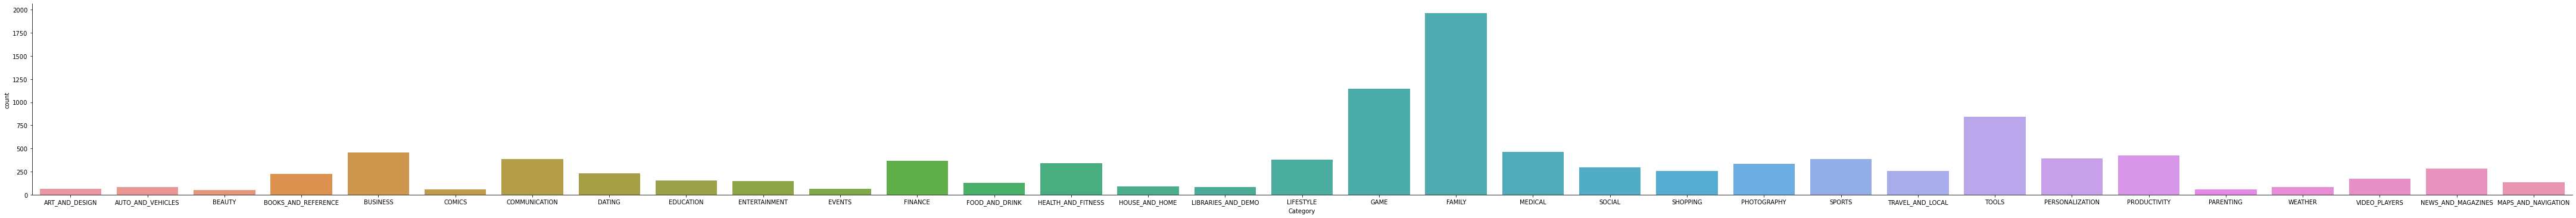

In [28]:
#1
sns.catplot(data=data,x='Category',aspect=12,kind='count')

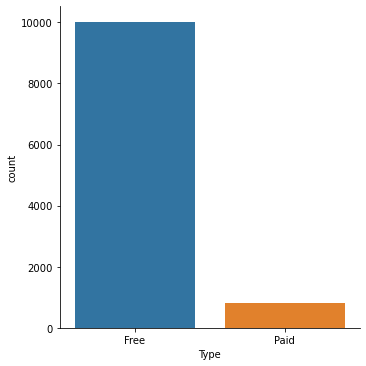

In [29]:
#2
sns.catplot(data=data,x='Type',kind='count')

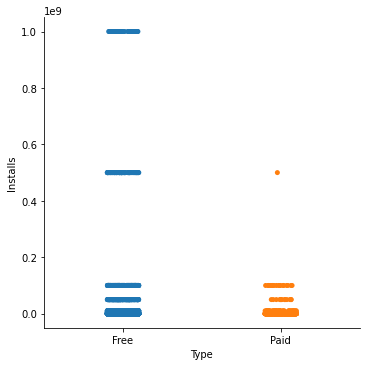

In [41]:
#2
sns.catplot(data=data,x='Type',y='Installs')

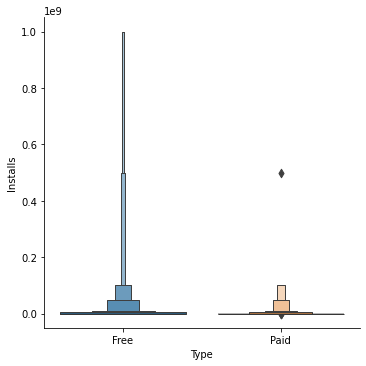

In [42]:
#2
sns.catplot(data=data,x='Type',y='Installs',kind='boxen')

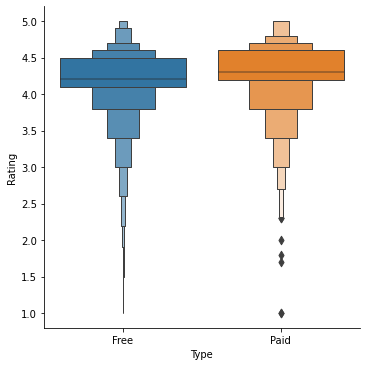

In [43]:
#2
sns.catplot(data=data,x='Type',y='Rating',kind="boxen")

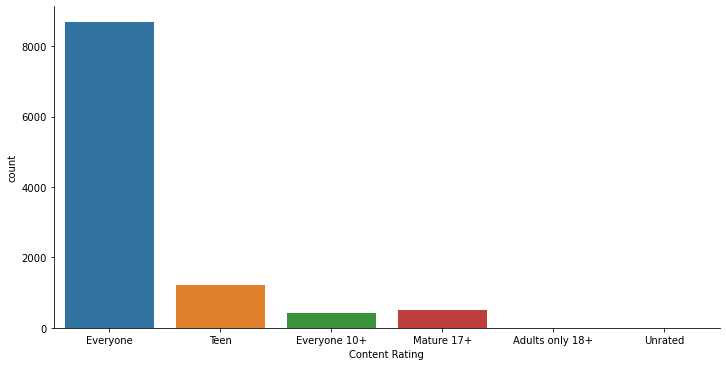

In [47]:
#3
sns.catplot(data=data,x='Content Rating',kind='count',aspect=2)

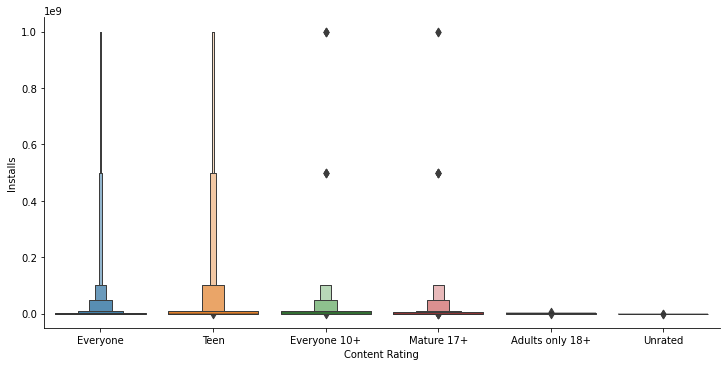

In [45]:
#3
sns.catplot(x='Content Rating', y='Installs', data=data, height=5, aspect=2,kind='boxen')

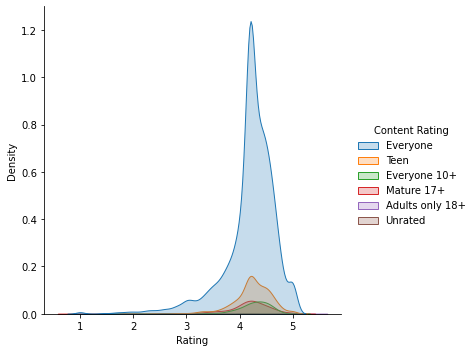

In [44]:
sns.displot(data=data,x='Rating',kind='kde',hue='Content Rating',fill=True)

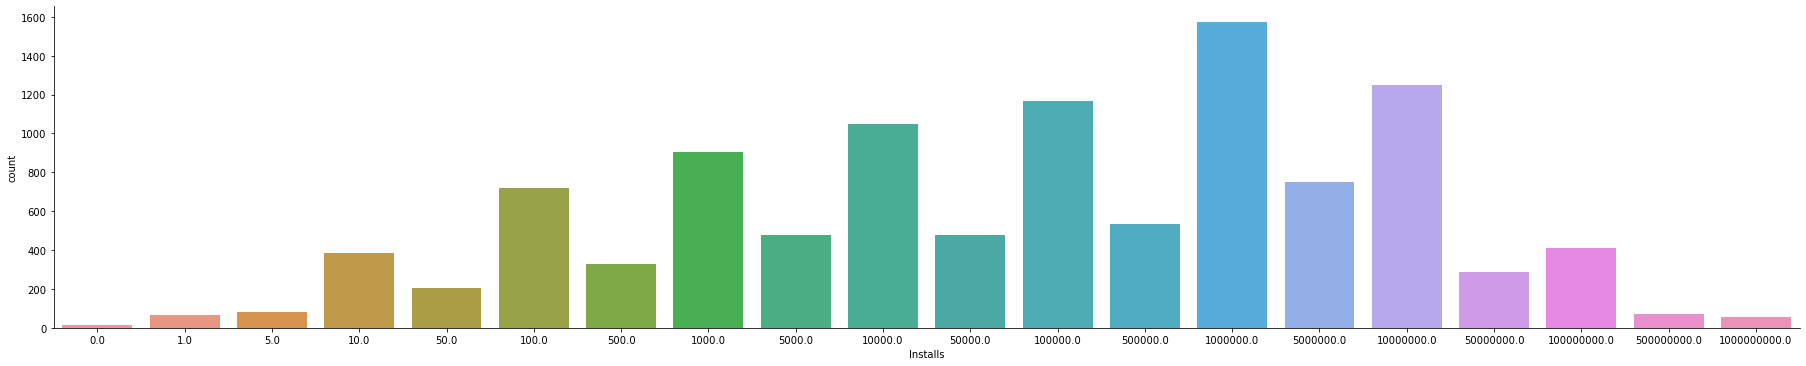

In [30]:
sns.catplot(x="Installs", kind="count", data=data,aspect=5)

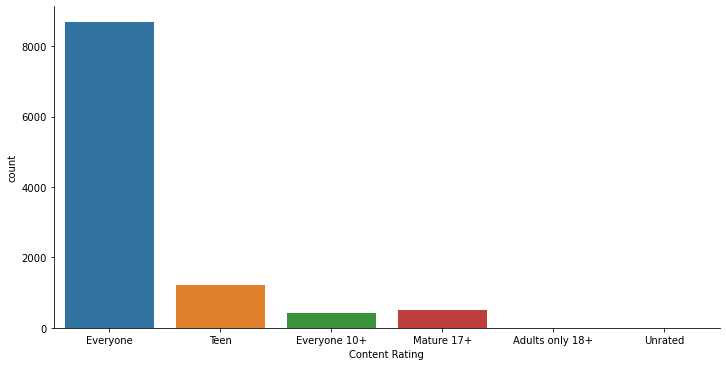

In [31]:
sns.catplot(x="Content Rating", kind="count", data=data,aspect=2)

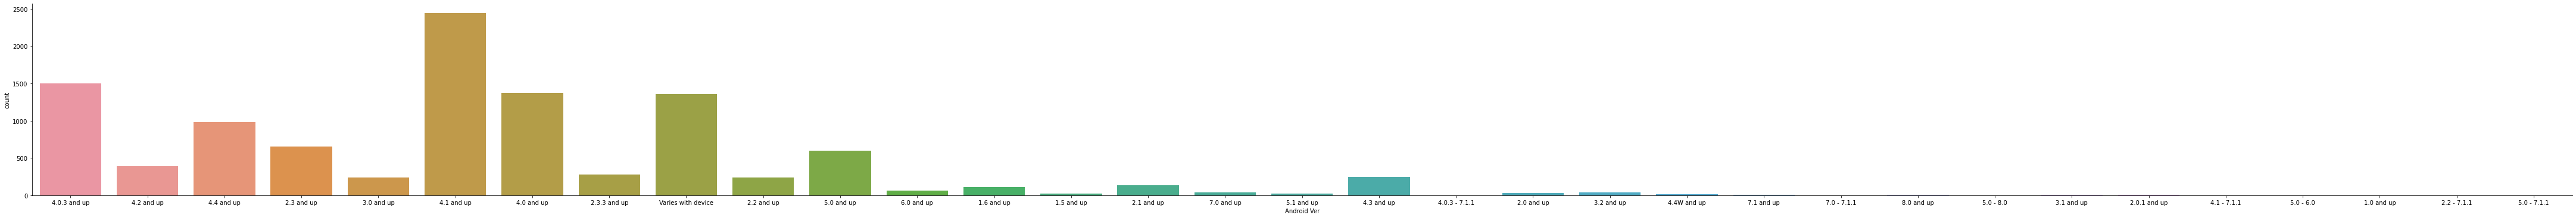

In [32]:
sns.catplot(data=data,x='Android Ver',kind='count',aspect=12)

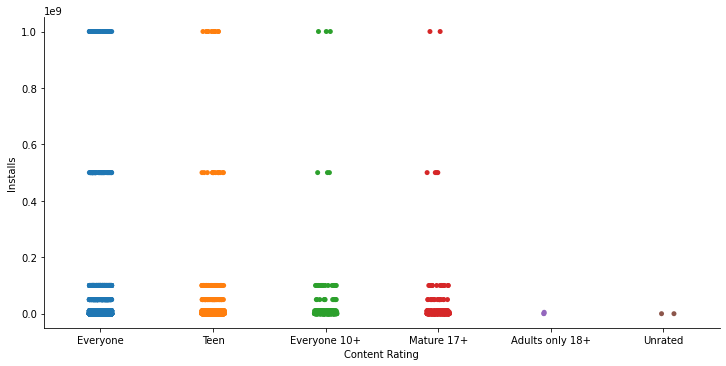

In [34]:
sns.catplot(x='Content Rating', y='Installs', data=data, height=5, aspect=2)

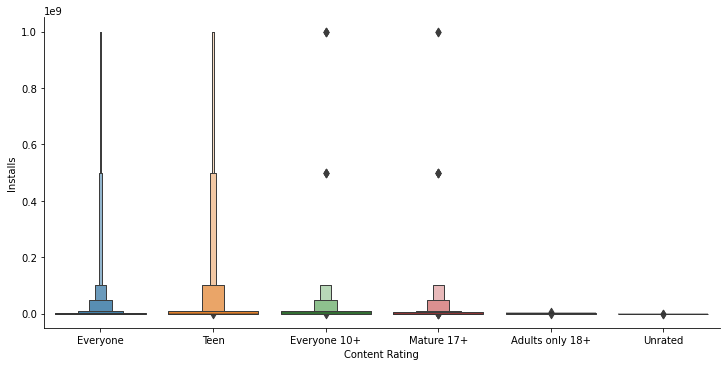

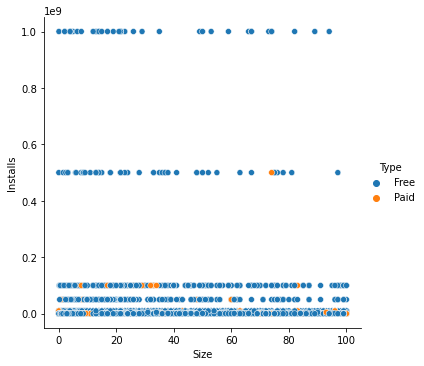

In [40]:
sns.relplot(data=data,x='Size',y='Installs',hue='Type')

## Send us the Result (Maktabkhoone)